Number of lines in CSV: (8036, 7)
Min Steering Angle:-0.9426954
Max Steering Angle:1.0


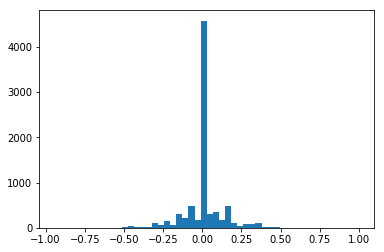

In [1]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import pandas as pd

path = '/data1/udacity/simulator/data'
img_path = path +'/IMG'
csv_file = path +'/driving_log.csv'

csv_array=pd.read_csv(csv_file)

print("Number of lines in CSV: " + str(csv_array.shape))

import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(csv_array.steering, bins=50)
print("Min Steering Angle:" + str(min(csv_array.steering)))
print("Max Steering Angle:" + str(max(csv_array.steering)))

0
1
2
0
1
2
0
1
2


/home/alans/anaconda2/envs/cancer_tutorial_tf/lib/python2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


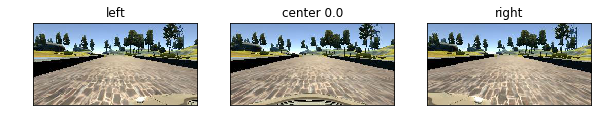

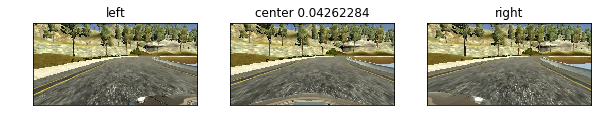

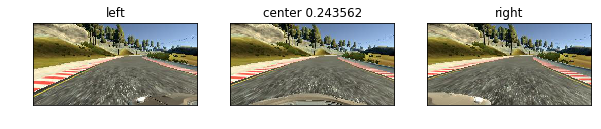

In [2]:
# center, left, right, steering angle, throttle, break, speed

# preprocess the data

X_full_name = []
y_full_angle= []

line = csv_array.iloc[0]
  #print(line)

    
def plotCameraImages(line):
  fig, axes = plt.subplots(1, 3)
  fig.set_figwidth(10)
  fig.set_figheight(20)

  i=0
  for camera in ['left','center','right']:
    print(i)
    axes.flat[i].imshow(Image.open(path+'/'+line[camera].decode('UTF-8').strip()))
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    if (camera=='center'):
       axes.flat[i].set_title(camera+' ' +str(line['steering']))
    else:
       axes.flat[i].set_title(camera)
        
    i=i+1
    
plotCameraImages(csv_array.iloc[0])
plotCameraImages(csv_array.iloc[1900])
plotCameraImages(csv_array[csv_array.steering < 0.26 ][csv_array.steering>0.24].iloc[4])
    


In [3]:

csv_array.head()


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


0
(160, 320, 3)
1
(160, 320, 3)
2
(66, 200, 3)


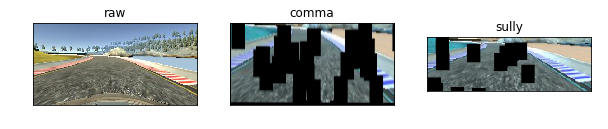

In [4]:
import driving_data

filename = driving_data.val_xs[0]
img=[]
img.append( np.array(Image.open(filename)))
img.append( driving_data.process_image_comma(filename).transpose( 1, 2, 0) )
img.append( driving_data.process_image_sully(filename) )


fig, axes = plt.subplots(1, 3)
fig.set_figwidth(10)
fig.set_figheight(20)

i=0
for camera in ['raw','comma','sully']:
    print(i)
    print(img[i].shape)
    axes.flat[i].imshow(img[i])
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    axes.flat[i].set_title(camera)
    i=i+1



(array([   2.,    0.,    1.,    0.,    0.,    0.,    1.,    0.,    1.,
           2.,    0.,   14.,    5.,   13.,   37.,   18.,   29.,  102.,
          51.,  133.,   92.,  250.,  171.,  158.,  316.,  173.,  139.,
         191.,  169.,  108.,   47.,  131.,   36.,   21.,   24.,   19.,
           4.,    2.,    3.,    0.,    0.,    1.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    1.]),
 array([-1.0926954 , -1.04784149, -1.00298758, -0.95813368, -0.91327977,
        -0.86842586, -0.82357195, -0.77871804, -0.73386414, -0.68901023,
        -0.64415632, -0.59930241, -0.5544485 , -0.5095946 , -0.46474069,
        -0.41988678, -0.37503287, -0.33017896, -0.28532506, -0.24047115,
        -0.19561724, -0.15076333, -0.10590942, -0.06105552, -0.01620161,
         0.0286523 ,  0.07350621,  0.11836012,  0.16321402,  0.20806793,
         0.25292184,  0.29777575,  0.34262966,  0.38748356,  0.43233747,
         0.47719138,  0.52204529,  0.5668992 ,  0.6117531 ,  0.65660701,
         0.70146

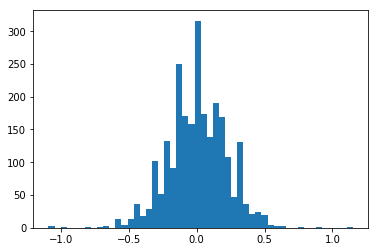

In [5]:
plt.hist(driving_data.val_ys, bins=50)